# Sobre o algoritmo Rank to Page

O intuito desse jupyter notebook é desenvolver da melhor forma, o algoritmo de rank de grafo, tendo como base o algoritmo de Stanford, criado por Larry Page (PageRank), utilizado para ranquear as páginas mais relevantes da Web, feito pelo Google.

----------------
Bibliotecas

In [248]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

-----------------------
Criando Grafo com arestas

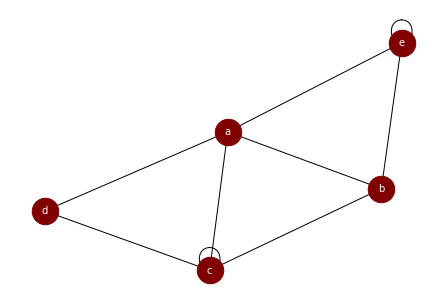

In [249]:
def novo_grafo(nos, arestas):
        G = nx.Graph()
        for i in range(nos):
                G.add_node(chr(ord('a') + i))

        for i in range(arestas):
                nos_1 = np.random.randint(nos)
                nos_2 = np.random.randint(nos)

                G.add_edge(chr(ord('a') + nos_1), chr(ord('a') + nos_2))
        return G

G = novo_grafo(5, 15)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='#800000',
        edge_color='black', font_size=10, font_color='white')

----------------
Criando matriz para melhorar a visualização e a utilização do grafo, dos nós e arestas.

[[0. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1.]]


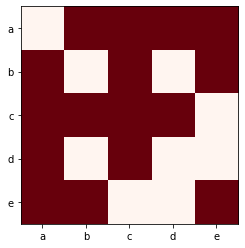

In [250]:
matriz = nx.to_numpy_matrix(G)
for i in range(len(matriz)):
    for j in range(len(matriz)):
        if G.has_edge(i, j):
            matriz[i][j] = 1

print(matriz)


plt.imshow(matriz, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(matriz)), list(G.nodes()))
plt.yticks(range(len(matriz)), list(G.nodes()))
plt.show()


----------------
Calculo de Rank:

<div style="background-color: white; width: 300px">
    <img src="calc_to_rank.png">
</div>

In [251]:
def rank_to_graph(matriz, rank_nodes):
    if rank_nodes is None:
        rank_nodes = [1 / len(matriz) for i in range(len(matriz))]

    list_sum_arestas, list_r, list_rank = np.zeros(len(matriz)), np.zeros(len(matriz)), np.zeros(len(matriz))

    for i in range(len(matriz)):
        list_sum_arestas[i] = np.sum(matriz[i])

    for i in range(len(matriz)):
        list_r[i] = rank_nodes[i] / list_sum_arestas[i]
        
    for i in range(len(matriz)):
        for j in range(len(matriz)):
            list_to_sum_nodes = []
            if matriz[i,j] == 1 and i != j:
                list_to_sum_nodes = np.append(list_to_sum_nodes, list_r[i])
        list_rank[i] = (1 - 0.85) / len(matriz) + 0.85 * np.sum(list_to_sum_nodes)    
        
    rank_final = np.zeros((len(matriz), 1))
    for i in range(len(matriz)):
        rank_final[i] = list_rank[i]

    return rank_final

print(rank_to_graph(matriz, None))

[[0.0725    ]
 [0.08666667]
 [0.03      ]
 [0.03      ]
 [0.03      ]]


[0.038 0.042 0.03  0.03  0.03 ]


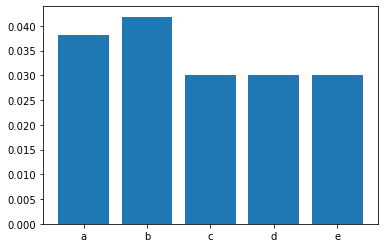

In [252]:
rank = np.zeros((len(matriz), 1))

for i in range(len(matriz)):
    rank[i] = rank_to_graph(matriz, None)[i]

k = 0
while k < 20:
    rank = np.append(rank, rank_to_graph(matriz, rank[:,-1]), axis = 1)
    k += 1

print(np.round(rank, decimals=3)[:,-1])

plt.bar(range(len(rank)), rank[:, -1])
plt.xticks(range(len(rank)), list(G.nodes()))
plt.show()

